In [1]:
!wget "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"

--2023-10-04 12:53:47--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [ <=>                ] 999.85K  6.11MB/s    in 0.2s    

2023-10-04 12:53:47 (6.11 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [2]:
!unzip "bank+marketing.zip"
!unzip "bank-additional.zip"

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [6]:
data = pd.DataFrame(pd.read_csv("bank-additional/bank-additional-full.csv",sep=';'))

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data = data.loc[data['job'] != 'unknown']
data = data.loc[data['loan'] != 'unknown']
data = data.loc[data['housing'] != 'unknown']
data = data.loc[data['marital'] != 'unknown']
data = data.loc[data['education'] != 'unknown']
data = data.loc[data['default'] != 'unknown']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [10]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age                14.000
duration          218.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.648
nr.employed       129.000
dtype: float64


<ipython-input-10-e51f0799f4e8>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=data.quantile(0.25)
<ipython-input-10-e51f0799f4e8>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=data.quantile(0.75)


<Axes: ylabel='Frequency'>

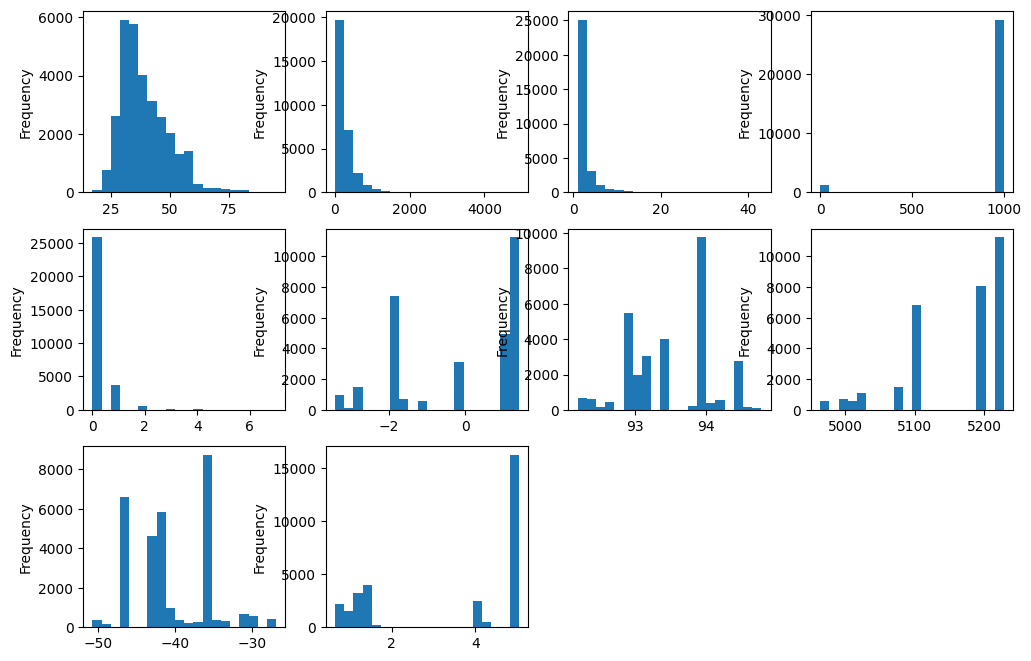

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(3,4,1)
data['age'].plot(kind='hist',bins=20)
plt.subplot(3,4,2)
data['duration'].plot(kind='hist',bins=20)
plt.subplot(3,4,3)
data['campaign'].plot(kind='hist',bins=20)
plt.subplot(3,4,4)
data['pdays'].plot(kind='hist',bins=20)
plt.subplot(3,4,5)
data['previous'].plot(kind='hist',bins=20)
plt.subplot(3,4,6)
data['emp.var.rate'].plot(kind='hist',bins=20)
plt.subplot(3,4,7)
data['cons.price.idx'].plot(kind='hist',bins=20)
plt.subplot(3,4,8)
data['nr.employed'].plot(kind='hist',bins=20)
plt.subplot(3,4,9)
data['cons.conf.idx'].plot(kind='hist',bins=20)
plt.subplot(3,4,10)
data['euribor3m'].plot(kind='hist',bins=20)

In [13]:
#drop the values that are not in the quartile range as outliers column wise
columns = ['job','education', 'marital','default','housing','contact','loan','month','day_of_week','potcome']
for column in data.columns:
  if column not in column:
    data.drop(data[(data[column] < (Q1.column - 1.5*IQR.column)) | (data[column] > (Q3.column + 1.5 * IQR.column))].index, inplace=True)

In [19]:
data = data.drop('default',axis=1)

KeyError: ignored

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   housing         30488 non-null  object 
 5   loan            30488 non-null  object 
 6   contact         30488 non-null  object 
 7   month           30488 non-null  object 
 8   day_of_week     30488 non-null  object 
 9   duration        30488 non-null  int64  
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

In [21]:
label_encoder = LabelEncoder()

In [22]:
data['marital'] = label_encoder.fit_transform(data['marital'])
data['contact'] = label_encoder.fit_transform(data['contact'])
data['housing'] = label_encoder.fit_transform(data['housing'])
data['education'] = label_encoder.fit_transform(data['education'])
data['loan'] = label_encoder.fit_transform(data['loan'])
data['day_of_week'] = label_encoder.fit_transform(data['day_of_week'])
data['job'] = label_encoder.fit_transform(data['job'])
data['month'] = label_encoder.fit_transform(data['month'])
data['y'] = label_encoder.fit_transform(data['y'])
data['poutcome'] = label_encoder.fit_transform(data['poutcome'])

In [23]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,1,6,1,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: xlabel='age', ylabel='Count'>

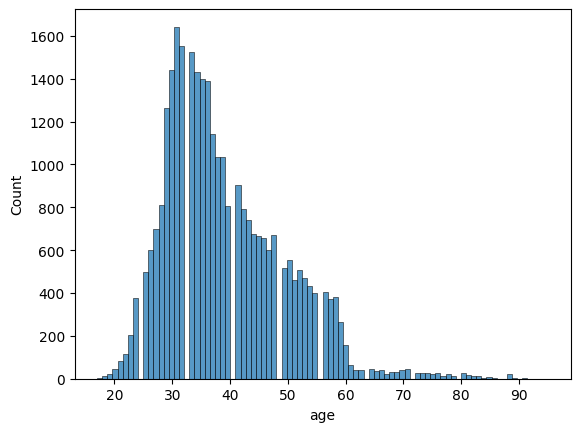

In [24]:
sns.histplot(data['age'])

In [25]:
data.corr()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.005445,-0.401092,-0.129621,0.004658,-0.010933,-0.011956,-0.010303,-0.013425,0.007910,-0.002364,-0.050891,0.049231,0.010737,-0.050409,-0.035762,0.125017,-0.036481,-0.064586,0.048727
job,-0.005445,1.000000,0.019123,0.104364,0.005599,-0.018978,-0.029618,-0.036197,-0.002137,-0.009140,-0.007037,-0.020336,0.012920,0.010156,-0.003615,-0.017513,0.041909,-0.004269,-0.012132,0.020540
marital,-0.401092,0.019123,1.000000,0.112834,0.008898,0.003601,-0.059260,-0.022090,0.005922,0.002199,-0.005575,-0.028998,0.028645,0.002132,-0.071317,-0.050203,-0.037370,-0.081454,-0.072673,0.037563
education,-0.129621,0.104364,0.112834,1.000000,0.020265,0.009288,-0.095676,-0.090510,-0.014948,-0.018710,0.008490,-0.028500,0.016188,0.023101,-0.007274,-0.063572,0.084109,0.000187,-0.003026,0.040804
housing,0.004658,0.005599,0.008898,0.020265,1.000000,0.046994,-0.080567,-0.013312,0.000415,-0.007806,-0.011203,-0.007542,0.021081,-0.013034,-0.059164,-0.077432,-0.036032,-0.058551,-0.045070,0.010071
loan,-0.010933,-0.018978,0.003601,0.009288,0.046994,1.000000,-0.009017,-0.003385,-0.009594,0.006320,0.006597,0.003056,-0.003506,-0.003767,0.000020,-0.002232,-0.018878,-0.002462,0.002447,-0.005026
contact,-0.011956,-0.029618,-0.059260,-0.095676,-0.080567,-0.009017,1.000000,0.239628,-0.013464,-0.028954,0.079889,0.115152,-0.201760,0.106626,0.380922,0.564491,0.225466,0.383964,0.259555,-0.143859
month,-0.010303,-0.036197,-0.022090,-0.090510,-0.013312,-0.003385,0.239628,1.000000,0.023880,-0.000723,-0.067576,-0.046298,0.104798,-0.069068,-0.183165,-0.019853,-0.007641,-0.121565,-0.216905,-0.003915
day_of_week,-0.013425,-0.002137,0.005922,-0.014948,0.000415,-0.009594,-0.013464,0.023880,1.000000,0.024427,-0.039839,-0.007455,-0.004170,0.016699,0.034492,0.005528,0.036272,0.041540,0.032642,0.020523
duration,0.007910,-0.009140,0.002199,-0.018710,-0.007806,0.006320,-0.028954,-0.000723,0.024427,1.000000,-0.068406,-0.046239,0.018772,0.035627,-0.023374,0.012768,-0.009525,-0.028922,-0.040367,0.393530


In [26]:
data.corr()['y'][:-1]

age               0.048727
job               0.020540
marital           0.037563
education         0.040804
housing           0.010071
loan             -0.005026
contact          -0.143859
month            -0.003915
day_of_week       0.020523
duration          0.393530
campaign         -0.069206
pdays            -0.327509
previous          0.228003
poutcome          0.143632
emp.var.rate     -0.305365
cons.price.idx   -0.128752
cons.conf.idx     0.061638
euribor3m        -0.315869
nr.employed      -0.364230
Name: y, dtype: float64

<Axes: >

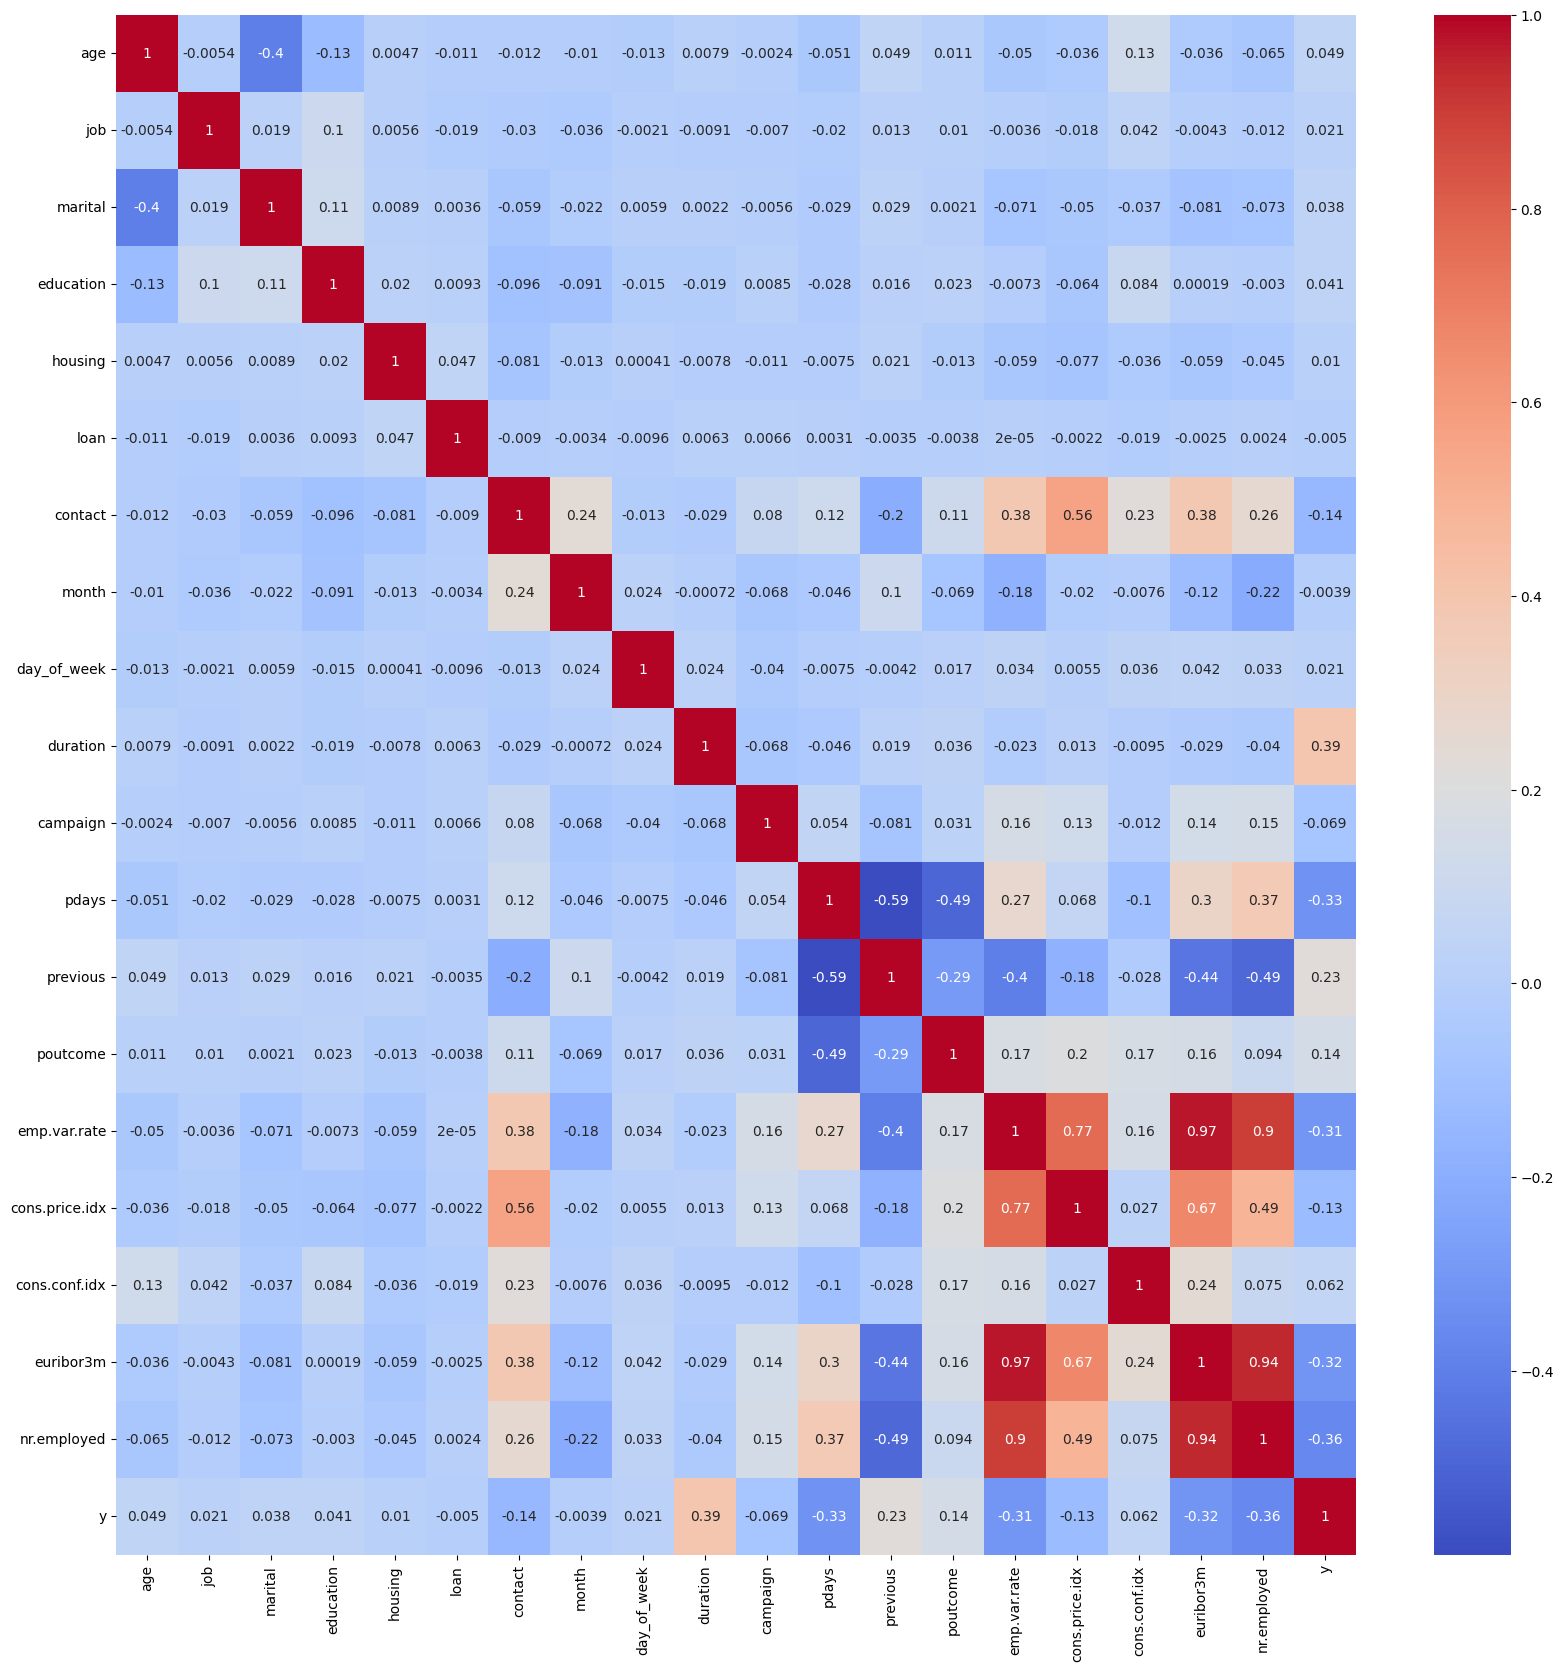

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [28]:
#data split
from sklearn.model_selection import train_test_split
X=data.drop('y', axis = 1)
y = data['y']
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
#prediction on test set
y_pred = logistic_regression.predict(X_test)
#model evaluation using accuracy, f-1 score , precision and recall
from sklearn.metrics import accuracy_score , f1_score , precision_score,recall_score
accuracy = accuracy_score(y_test , y_pred)
f1 = f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)

In [37]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("precision:", precision)
print("Recall:", recall)

Accuracy: 0.8972710574652322
F1 Score: 0.49451258876694637
precision: 0.6603448275862069
Recall: 0.39525283797729616


In [38]:
#using random forest method
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
#Prediction on test set
y_pred_rf = random_forest.predict(X_test)

In [39]:
# from sklearn.metrics import accuracy_score,f1_score, precision_score
accuracy_random_forest=accuracy_score(y_test,y_pred_rf)
f1_random_forest = f1_score(y_test,y_pred_rf)
precision_random_forest = precision_score(y_test,y_pred_rf)
recall_random_forest=recall_score(y_test,y_pred_rf)


In [41]:
print("values according to random forest method")
print("Accuracy:", accuracy_random_forest)
print("F1 Score:", f1_random_forest)
print("precision:", precision_random_forest)
print("Recall:", recall_random_forest)

values according to random forest method
Accuracy: 0.9013382314353188
F1 Score: 0.5712656784492588
precision: 0.6382165605095541
Recall: 0.5170278637770898


In [42]:
#using decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
#prediction on test set
y_pred_dt = dTree.predict(X_test)


In [43]:
accuracy_dTree = accuracy_score(y_test,y_pred_dt)
f1_dTree = f1_score(y_test, y_pred_dt)
precision_dTree = precision_score(y_test, y_pred_dt)
recall_dTree = recall_score(y_test,y_pred_dt)

In [45]:
print("values according to decision tree")
print("Accuracy:", accuracy_dTree)
print("F1 Score:", f1_dTree)
print("precision:", precision_dTree)
print("Recall:", recall_dTree)

values according to decision tree
Accuracy: 0.8828391498294411
F1 Score: 0.5375453133091663
precision: 0.5395010395010394
Recall: 0.5356037151702786
